In [1]:
from sklearn.model_selection import train_test_split
import os
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import sys
import math
from nltk.stem import PorterStemmer
from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import lil_matrix
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
ps = PorterStemmer()
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

In [2]:
stop_words = set(stopwords.words('english'))

In [3]:
df=pd.read_csv("Dataset.csv")
df=df.drop(['Unnamed: 2'], axis = 1) 

# TF-IDF Embeddings

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'],df['Validity'], test_size=0.2,random_state=33)
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

y=np.array(y_train)
y=y.astype('int')

# Decision Tree

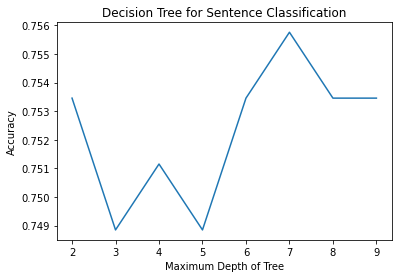

In [5]:
accuracy = []
k = np.arange(2,10)
for depth in k:
    # train data
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    clf.fit(X_train_tfidf,y)

    # test data
    prediction= clf.predict(X_test_tfidf)
    correct = 0
    correct += np.sum(prediction == y_test)
    accuracy.append(correct/len(prediction))
plt.title("Decision Tree for Sentence Classification")
plt.xlabel("Maximum Depth of Tree")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# Polynomial SVM (Expermient with C)

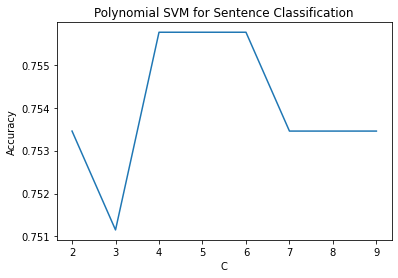

In [6]:
accuracy = []
k = np.arange(2,10)
for c in k:
    classifier= svm.SVC(kernel= 'poly',degree=2, C= c, decision_function_shape='ovr')
    classifier.fit(X_train_tfidf,y)
    predict_labels= classifier.predict(X_test_tfidf)
    correct = 0
    correct += np.sum(predict_labels == y_test)
    accuracy.append(correct/len(prediction))
plt.title("Polynomial SVM for Sentence Classification")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# Polynomial SVM (Experiment with Degree)

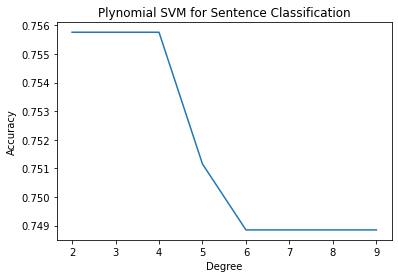

In [7]:
accuracy = []
k = np.arange(2,10)
for degree in k:
    classifier= svm.SVC(kernel= 'poly',degree=degree, C= 4, decision_function_shape='ovr')
    classifier.fit(X_train_tfidf,y)
    predict_labels= classifier.predict(X_test_tfidf)
    correct = 0
    correct += np.sum(predict_labels == y_test)
    #print(correct/len(prediction))
    accuracy.append(correct/len(prediction))
plt.title("Plynomial SVM for Sentence Classification")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# Linear SVM

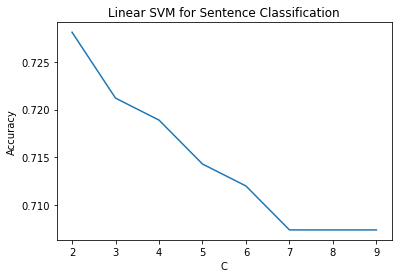

In [8]:
accuracy = []
k = np.arange(2,10)
for c in k:
    classifier= svm.SVC(kernel= 'linear', C= c, decision_function_shape='ovr')
    classifier.fit(X_train_tfidf,y)
    predictiction= classifier.predict(X_test_tfidf)
    correct = 0
    correct += np.sum(predictiction == y_test)
    accuracy.append(correct/len(prediction))
plt.title("Linear SVM for Sentence Classification")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# KNeighbours

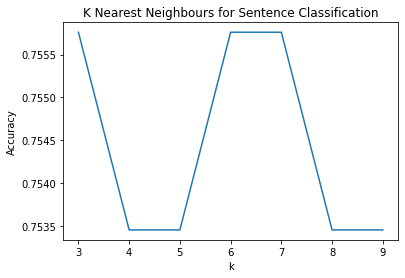

In [9]:
accuracy = []
k = np.arange(3,10)
for numberOfNeighbours in k:
    knn = KNeighborsClassifier(n_neighbors=numberOfNeighbours, metric='euclidean')
    knn.fit(X_train_tfidf, y)
    prediction = knn.predict(X_test_tfidf)
    correct = 0
    correct += np.sum(prediction == y_test)
    accuracy.append(correct/len(prediction))
    
plt.title("K Nearest Neighbours for Sentence Classification")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# Random Forest

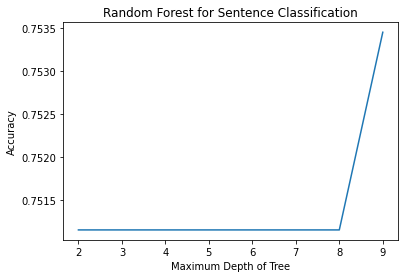

In [10]:
accuracy = []
k = np.arange(2,10)
for depth in k:
    clf = RandomForestClassifier(max_depth=depth, random_state=1)
    clf.fit(X_train_tfidf, y)
    prediction = clf.predict(X_test_tfidf)
    correct = 0
    correct += np.sum(prediction == y_test)
    accuracy.append(correct/len(prediction))

plt.title("Random Forest for Sentence Classification")
plt.xlabel("Maximum Depth of Tree")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# Word to Vec

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'],df['Validity'], test_size=0.2,random_state=33)

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

ps= PorterStemmer()
tokenized_text= [sentence.split() for sentence in X_train]
data= []
for tokenList in tokenized_text:
    temp =[]
    for token in tokenList:
        if(token not in stop_words):
            temp.append(ps.stem(token))
    data.append(temp)

path = get_tmpfile("word2vec.model")
model = Word2Vec(data, size=100, window=5, min_count=2, workers=4)
model.save("word2vec.model")

model = Word2Vec.load("word2vec.model")

tokenized_text= [sentence.split() for sentence in X_train]
data= []

zero = int(0) 
for tokenList in tokenized_text:
    zerosList= [zero for i in range(100)]
    temp =[]
    temp.append(zerosList)
    #print(temp)
    for token in tokenList:
        if token not in stop_words and token in model:
            temp.append(model[ps.stem(token)])
    temp= np.array(temp)
    temp= np.mean(temp, axis=0)
    data.append(temp)

xtrain = np.zeros((len(data),100))
i=-1
j=-1
for values in data:
    i+=1
    j=-1
    for q in range(values.shape[0]):
        xtrain[i][j]=values[q]
X_train=xtrain

tokenized_text= [sentence.split() for sentence in X_test]
data= []
for tokenList in tokenized_text:
    zerosList= [zero for i in range(100)]
    temp =[]
    temp.append(zerosList)
    for token in tokenList:
        if token not in stop_words and token in model:
            temp.append(model[ps.stem(token)])
    temp= np.array(temp)
    temp= np.mean(temp, axis=0)
    data.append(temp)
    
xtest = np.zeros((len(data),100))
i=-1
j=-1
for a in data:
    i+=1
    j=-1
    for q in range(values.shape[0]):
        xtest[i][j]=values[q]   
X_test=xtest

<ipython-input-11-e092169b78fd>:32: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if token not in stop_words and token in model:
<ipython-input-11-e092169b78fd>:33: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  temp.append(model[ps.stem(token)])
<ipython-input-11-e092169b78fd>:55: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if token not in stop_words and token in model:
<ipython-input-11-e092169b78fd>:56: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  temp.append(model[ps.stem(token)])


In [12]:
# choose a number of time steps
y_train = np.array(y_train)
input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='sigmoid'))
model.add(layers.Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,epochs=100,verbose=False,validation_data=(X_test, y_test),batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.7131
Testing Accuracy:  0.7512


# Decision Tree

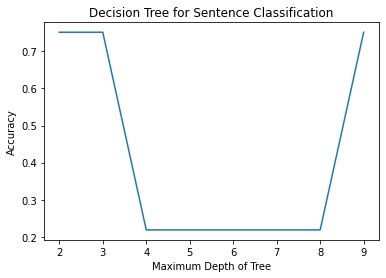

In [13]:
accuracy = []
k = np.arange(2,10)
for depth in k:
    # train data
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    clf.fit(X_train,y)

    # test data
    prediction= clf.predict(X_test)
    correct = 0
    correct += np.sum(prediction == y_test)
    accuracy.append(correct/len(prediction))
plt.title("Decision Tree for Sentence Classification")
plt.xlabel("Maximum Depth of Tree")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# Polynomial SVM (Expermient with C)

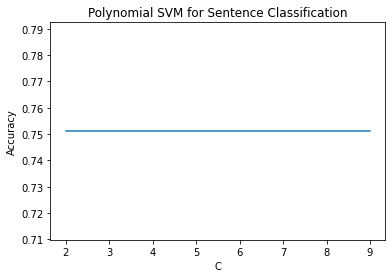

In [14]:
accuracy = []
k = np.arange(2,10)
for c in k:
    classifier= svm.SVC(kernel= 'poly',degree=2, C= c, decision_function_shape='ovr')
    classifier.fit(X_train,y)
    predict_labels= classifier.predict(X_test)
    correct = 0
    correct += np.sum(predict_labels == y_test)
    accuracy.append(correct/len(prediction))
plt.title("Polynomial SVM for Sentence Classification")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# Polynomial SVM (Experiment with Degree)

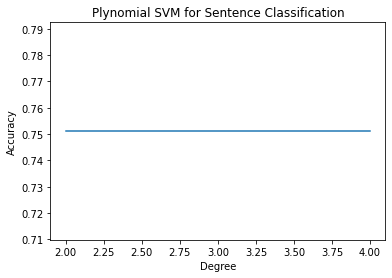

In [19]:
accuracy = []
k = np.arange(2,5)
for degree in k:
    classifier= svm.SVC(kernel= 'poly',degree=degree, C= 4, decision_function_shape='ovr')
    classifier.fit(X_train,y)
    predict_labels= classifier.predict(X_test)
    correct = 0
    correct += np.sum(predict_labels == y_test)
    #print(correct/len(prediction))
    accuracy.append(correct/len(prediction))
plt.title("Plynomial SVM for Sentence Classification")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# Linear SVM

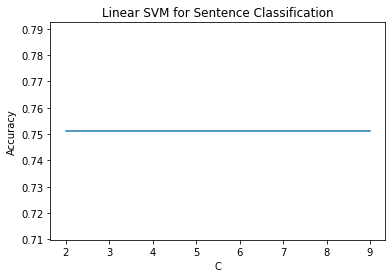

In [16]:
accuracy = []
k = np.arange(2,10)
for c in k:
    classifier= svm.SVC(kernel= 'linear', C= c, decision_function_shape='ovr')
    classifier.fit(X_train,y)
    predictiction= classifier.predict(X_test)
    correct = 0
    correct += np.sum(predictiction == y_test)
    accuracy.append(correct/len(prediction))
plt.title("Linear SVM for Sentence Classification")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# KNeighbours

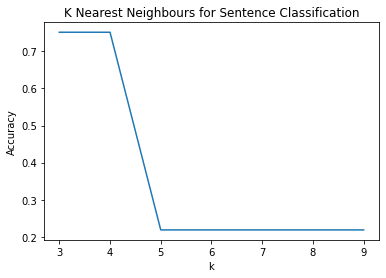

In [17]:
accuracy = []
k = np.arange(3,10)
for numberOfNeighbours in k:
    knn = KNeighborsClassifier(n_neighbors=numberOfNeighbours, metric='euclidean')
    knn.fit(X_train, y)
    prediction = knn.predict(X_test)
    correct = 0
    correct += np.sum(prediction == y_test)
    accuracy.append(correct/len(prediction))
    
plt.title("K Nearest Neighbours for Sentence Classification")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()

# Random Forest

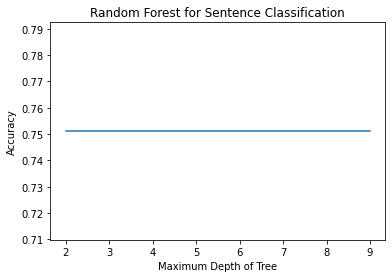

In [18]:
accuracy = []
k = np.arange(2,10)
for depth in k:
    clf = RandomForestClassifier(max_depth=depth, random_state=1)
    clf.fit(X_train, y)
    prediction = clf.predict(X_test)
    correct = 0
    correct += np.sum(prediction == y_test)
    accuracy.append(correct/len(prediction))

plt.title("Random Forest for Sentence Classification")
plt.xlabel("Maximum Depth of Tree")
plt.ylabel("Accuracy")
plt.plot(k,accuracy)
plt.show()